In [1]:
import pandas as pd

In [25]:
df = pd.read_excel("italy.xlsx")

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183615 entries, 0 to 183614
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   DA_SHIPMENT_NUMBER                     183615 non-null  int64         
 1   DA_DOCUMENT_NUMBER                     183580 non-null  object        
 2   Initial_SI_received_time               183615 non-null  datetime64[ns]
 3   Initial_Booking_request_received_time  183615 non-null  float64       
 4   DA_START_GEO_RE                        183615 non-null  object        
 5   DA_START_GEO_SR                        183615 non-null  object        
 6   DA_START_GEO_AR                        183615 non-null  object        
 7   DA_START_GEO_SA                        183615 non-null  object        
 8   DA_START_STD_LOC                       183615 non-null  object        
 9   DA_LAST_POD                            183615 no

In [27]:
df.columns

Index(['DA_SHIPMENT_NUMBER', 'DA_DOCUMENT_NUMBER', 'Initial_SI_received_time',
       'Initial_Booking_request_received_time', 'DA_START_GEO_RE',
       'DA_START_GEO_SR', 'DA_START_GEO_AR', 'DA_START_GEO_SA',
       'DA_START_STD_LOC', 'DA_LAST_POD', 'DA_END_STD_LOC', 'DA_END_GEO_RE',
       'DA_END_GEO_SR', 'DA_END_GEO_AR', 'DA_END_GEO_SA', 'DA_CU', 'DA_IS',
       'Doc_Cut_off_date'],
      dtype='object')

In [28]:
df.head(10)

,DA_SHIPMENT_NUMBER,DA_DOCUMENT_NUMBER,Initial_SI_received_time,Initial_Booking_request_received_time,DA_START_GEO_RE,DA_START_GEO_SR,DA_START_GEO_AR,DA_START_GEO_SA,DA_START_STD_LOC,DA_LAST_POD,DA_END_STD_LOC,DA_END_GEO_RE,DA_END_GEO_SR,DA_END_GEO_AR,DA_END_GEO_SA,DA_CU,DA_IS,Doc_Cut_off_date
0,63658980,HLCUGOA250606693,2025-06-10 15:41:28,45811.425694,S,IT,IT,PDA,ITBGZ,USBAL,USCMH,N,US,OH,CMH,DHLDAN 119,HAPAGL 58,45824
1,25861931,HLCUGOA2402APSR6,2024-02-28 09:14:50,45343.468241,S,IT,IT,SAL,ITSAL,USSAV,USBNA,N,US,SA,BNA,SEV 5,HAPAGL 58,45350
2,10687543,HLCUGOA230181043,2023-01-26 10:50:11,44945.413889,S,IT,IT,GOA,ITGOA,USORF,USORF,N,US,MA,ORF,ALBATR 30,HAPAGL 58,44952
3,66327216,HLCUGOA250332156,2025-03-17 09:45:33,45722.664722,S,IT,IT,GOA,ITGOA,INMUN,INMUN,M,IN,WE,MUN,CAVA 11,HAPAGL 58,45729
4,50832137,HLCUGOA250763150,2025-07-21 07:26:49,45848.363692,S,IT,IT,GOA,ITGOA,USORF,USORF,N,US,MA,ORF,SINTRA 5,HAPAGL 58,45859
5,90788995,HLCUGOA241058915,2024-10-24 08:59:34,45575.328970,S,IT,IT,MIL,ITFBI,PKBQM,PKBQM,M,AG,PK,BQM,CAVA 11,HAPAGL 58,45589
6,28224065,HLCUGOA240112576,2024-01-12 14:20:33,45296.409028,S,IT,IT,VCE,ITVCE,AUSYD,AUSYD,A,AN,AU,SYD,MONDIA 417,HAPAGL 58,45302
7,23956071,HLCUGOA2501ATLP3,2025-02-07 06:47:00,45686.290093,S,IT,IT,VCE,ITVCE,EGDAM,EGDAM,S,EG,EG,DAM,TRAMAC 9,HAPAGL 58,45691
8,37125358,HLCUGOA241267005,2024-12-27 13:24:18,45637.734722,S,IT,IT,GOA,ITGOA,VNSGN,VNSGN,A,SE,VN,SGN,JAS 53,HAPAGL 58,45667
9,30074304,HLCUGOA250606650,2025-06-06 15:38:24,45811.594688,S,IT,IT,SAL,ITSAL,INNSA,INNSA,M,IN,CE,NSA,CDC 2,HAPAGL 58,45814


In [29]:
df['si_received_count'] = 1
df.set_index('Initial_SI_received_time' , inplace=True)
hourly_si = df['si_received_count'].resample('h').sum()

In [30]:
hourly_si.head(10)

Initial_SI_received_time
2009-10-30 16:00:00    1
2009-10-30 17:00:00    0
2009-10-30 18:00:00    0
2009-10-30 19:00:00    0
2009-10-30 20:00:00    0
2009-10-30 21:00:00    0
2009-10-30 22:00:00    0
2009-10-30 23:00:00    0
2009-10-31 00:00:00    0
2009-10-31 01:00:00    0
Freq: h, Name: si_received_count, dtype: int64

In [31]:
hourly_si_filtered = hourly_si['2023-01-01':'2025-08-31']

In [32]:
hourly_si_filtered.tail(10)

Initial_SI_received_time
2025-08-31 14:00:00    1
2025-08-31 15:00:00    0
2025-08-31 16:00:00    0
2025-08-31 17:00:00    0
2025-08-31 18:00:00    0
2025-08-31 19:00:00    0
2025-08-31 20:00:00    0
2025-08-31 21:00:00    2
2025-08-31 22:00:00    1
2025-08-31 23:00:00    0
Freq: h, Name: si_received_count, dtype: int64

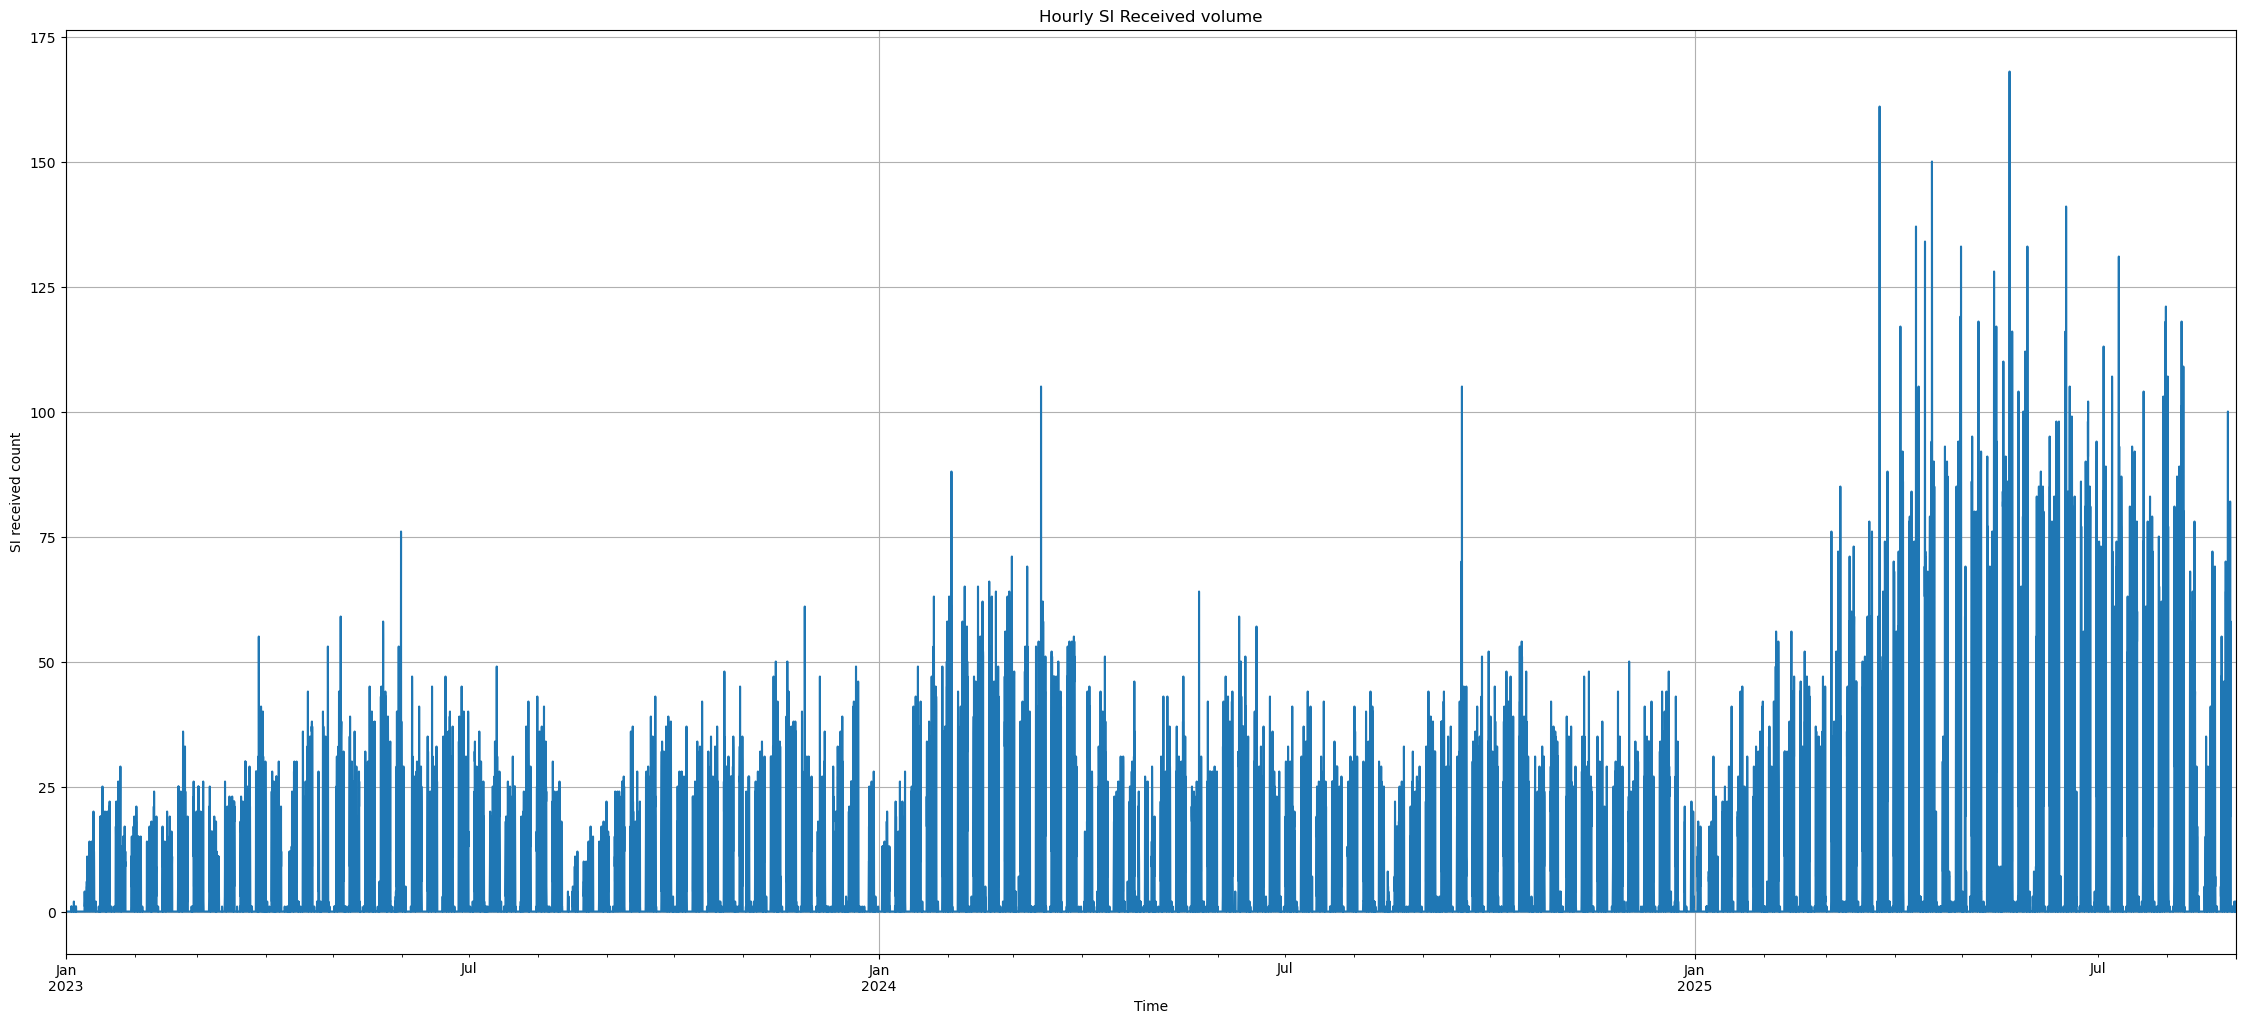

In [33]:
import matplotlib.pyplot as plt

hourly_si_filtered.plot(figsize=(28, 12), title='Hourly SI Received volume')
plt.xlabel('Time')
plt.ylabel('SI received count')
plt.grid(True)
plt.show()

In [34]:
df.head(5)

,DA_SHIPMENT_NUMBER,DA_DOCUMENT_NUMBER,Initial_Booking_request_received_time,DA_START_GEO_RE,DA_START_GEO_SR,DA_START_GEO_AR,DA_START_GEO_SA,DA_START_STD_LOC,DA_LAST_POD,DA_END_STD_LOC,DA_END_GEO_RE,DA_END_GEO_SR,DA_END_GEO_AR,DA_END_GEO_SA,DA_CU,DA_IS,Doc_Cut_off_date,si_received_count
Initial_SI_received_time,,,,,,,,,,,,,,,,,,
2025-06-10 15:41:28,63658980,HLCUGOA250606693,45811.425694,S,IT,IT,PDA,ITBGZ,USBAL,USCMH,N,US,OH,CMH,DHLDAN 119,HAPAGL 58,45824,1
2024-02-28 09:14:50,25861931,HLCUGOA2402APSR6,45343.468241,S,IT,IT,SAL,ITSAL,USSAV,USBNA,N,US,SA,BNA,SEV 5,HAPAGL 58,45350,1
2023-01-26 10:50:11,10687543,HLCUGOA230181043,44945.413889,S,IT,IT,GOA,ITGOA,USORF,USORF,N,US,MA,ORF,ALBATR 30,HAPAGL 58,44952,1
2025-03-17 09:45:33,66327216,HLCUGOA250332156,45722.664722,S,IT,IT,GOA,ITGOA,INMUN,INMUN,M,IN,WE,MUN,CAVA 11,HAPAGL 58,45729,1
2025-07-21 07:26:49,50832137,HLCUGOA250763150,45848.363692,S,IT,IT,GOA,ITGOA,USORF,USORF,N,US,MA,ORF,SINTRA 5,HAPAGL 58,45859,1


In [38]:
import pandas as pd

df = pd.read_excel("italy.xlsx")

df.set_index('Initial_SI_received_time', inplace=True)
df['day_of_week'] = df.index.dayofweek
df['hour'] = df.index.hour
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

df['si_received_count'] = 1
hourly_si = df['si_received_count'].resample('h').sum()
hourly_si_filtered = hourly_si['2023-01-01':'2025-08-31']

calendar_features = df[['day_of_week', 'is_weekend']].copy()
calendar_features_hourly = calendar_features.resample('h').max().fillna(0)

hourly_si_filtered = hourly_si_filtered.to_frame(name='SI_count')
calendar_features_filtered = calendar_features_hourly.reindex(hourly_si_filtered.index, fill_value=0)
hourly_si_filtered = hourly_si_filtered.join(calendar_features_filtered)

hourly_si_filtered['day_of_week'] = hourly_si_filtered['day_of_week'].astype(int)
hourly_si_filtered['is_weekend'] = hourly_si_filtered['is_weekend'].astype(int)

In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

features = ['SI_count', 'day_of_week', 'is_weekend']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(hourly_si_filtered[features])

seq_len = 720              
forecast_horizon = 1440    

X, y = [], []

for i in range(seq_len, len(scaled_data) - forecast_horizon):

    X.append(scaled_data[i-seq_len:i])
    y.append(scaled_data[i:i+forecast_horizon, 0])

X = np.array(X)
y = np.array(y)

In [39]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

features = ['SI_count', 'day_of_week', 'is_weekend']
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(hourly_si_filtered[features])

def create_sequence(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len, 0])
    return np.array(X), np.array(y)

seq_len = 48
X, y = create_sequence(scaled_data, seq_len)

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model_lstm = Sequential([
    LSTM(64, activation='relu', input_shape=(seq_len, 3)),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.fit(X_train, y_train, epochs=50,
               validation_data=(X_test, y_test))

Epoch 1/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - loss: 0.0019 - val_loss: 0.0091
Epoch 2/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - loss: 0.0013 - val_loss: 0.0204
Epoch 3/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - loss: 0.0011 - val_loss: 0.0505
Epoch 4/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - loss: 9.3235e-04 - val_loss: 0.0061
Epoch 5/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - loss: 8.2703e-04 - val_loss: 0.0058
Epoch 6/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 7.8555e-04 - val_loss: 0.0055
Epoch 7/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 17s 29ms/step - loss: 7.4841e-04 - val_loss: 0.0061
Epoch 8/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - loss: 7.3485e-04 - val_loss: 0.0049
Epoch 9/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 18s 30ms/step - loss: 7.1436e-04 - val_loss: 0.0053
Epoch 10/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 18s 31ms/step - loss: 7.0654e-04 - val_loss: 0.0049
Epoch 11/50
584/584 ━━━━━━━━━━━━━━━━━━━━ 16s 28ms/step - loss: 6.9327e-04 - val_loss: 0.005

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam


split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(forecast_horizon)   
])

model.compile(optimizer="adam", loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(
    X_train, y_train,
    epochs=150,
    batch_size=64,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/150
266/266 ━━━━━━━━━━━━━━━━━━━━ 263s 982ms/step - loss: 0.0032 - val_loss: 0.0195
Epoch 2/150
266/266 ━━━━━━━━━━━━━━━━━━━━ 273s 1s/step - loss: 0.0025 - val_loss: 0.0165
Epoch 3/150
266/266 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - loss: 0.0022 - val_loss: 0.0165
Epoch 4/150
266/266 ━━━━━━━━━━━━━━━━━━━━ 293s 1s/step - loss: 0.0021 - val_loss: 0.0162
Epoch 5/150
266/266 ━━━━━━━━━━━━━━━━━━━━ 276s 1s/step - loss: 0.0020 - val_loss: 0.0144
Epoch 6/150
266/266 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - loss: 0.0019 - val_loss: 0.0146
Epoch 7/150
266/266 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - loss: 0.0019 - val_loss: 0.0141
Epoch 8/150
266/266 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - loss: 0.0018 - val_loss: 0.0151
Epoch 9/150
266/266 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - loss: 0.0018 - val_loss: 0.0147
Epoch 10/150
266/266 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - loss: 0.0017 - val_loss: 0.0141
Epoch 11/150
266/266 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - loss: 0.0017 - val_loss: 0.0139
Epoch 12/150
266/266 ━━━━━━

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

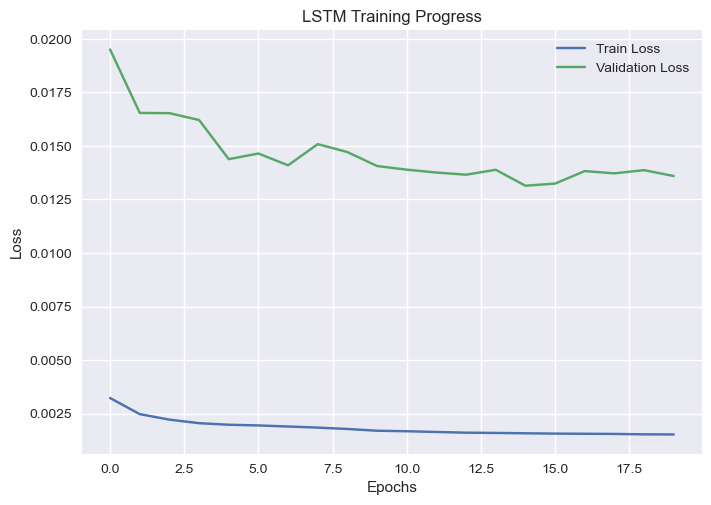

In [43]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Progress')
plt.show()

In [50]:
import matplotlib.pyplot as plt 
from sklearn.metrics import mean_squared_error, mean_absolute_error

train_rmse = mean_squared_error(y_train_inv, y_train_pred_inv, squared=False)
test_rmse = mean_squared_error(y_test_inv, y_test_pred_inv, squared=False)

train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)

print(f"Train RMSE: {train_rmse:.2f}, MAE: {train_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}, MAE: {test_mae:.2f}")

Train RMSE: 3.86, MAE: 1.87
Test RMSE: 10.54, MAE: 5.02


C:\Users\ISMAIMZ\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ISMAIMZ\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [44]:
y_train_pred = model_lstm.predict(X_train, verbose=0)
y_test_pred = model_lstm.predict(X_test, verbose=0)

In [48]:
def inverse_transform(pred_array):
    pred_full = pred_array.reshape(-1, 1)
    pred_padded = np.concatenate([
        pred_full,
        np.zeros((pred_array.shape[0], scaled_data.shape[1] - 1))
    ], axis=1)
    return scaler.inverse_transform(pred_padded)[:, 0]

y_train_pred_inv = inverse_transform(y_train_pred)
y_test_pred_inv = inverse_transform(y_test_pred)

y_train_inv = inverse_transform(y_train)
y_test_inv = inverse_transform(y_test)

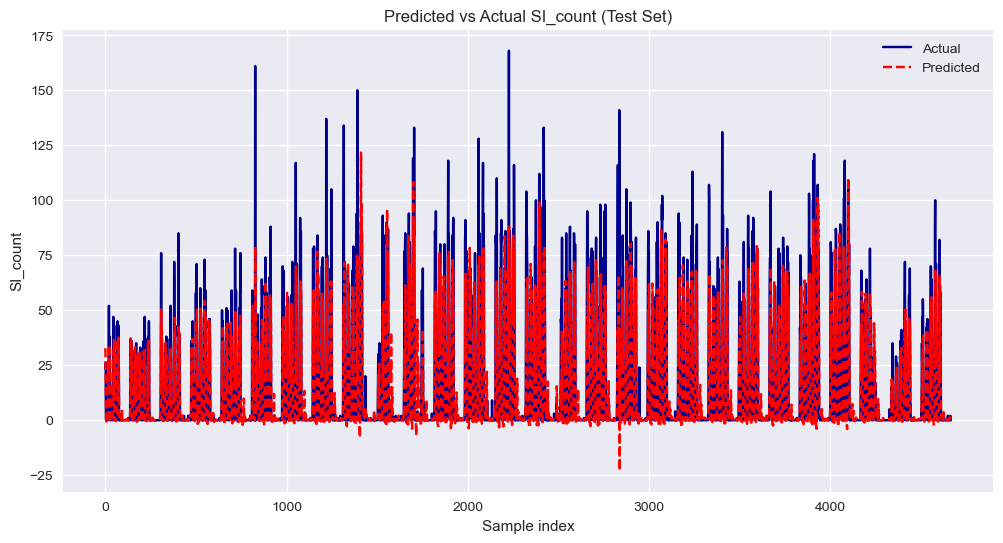

In [52]:
import numpy as np

plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label="Actual", color="darkblue")
plt.plot(y_test_pred_inv, label="Predicted", color="red", linestyle="--")
plt.title("Predicted vs Actual SI_count (Test Set)")
plt.xlabel("Sample index")
plt.ylabel("SI_count")
plt.legend()
plt.show()

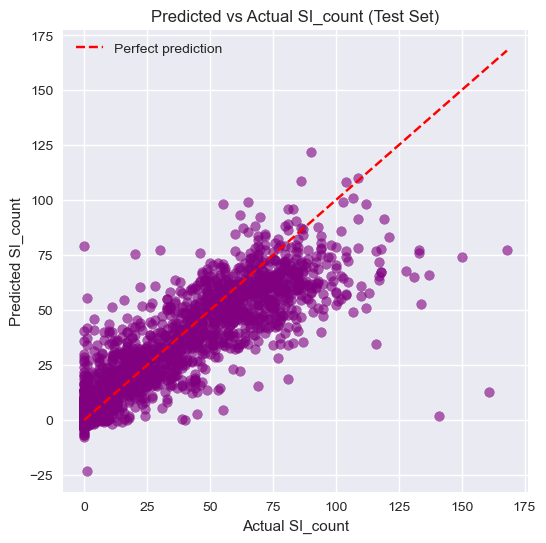

In [53]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_inv, y_test_pred_inv, alpha=0.6, color="purple")
plt.plot([y_test_inv.min(), y_test_inv.max()],
         [y_test_inv.min(), y_test_inv.max()],
         'r--', label="Perfect prediction")
plt.title("Predicted vs Actual SI_count (Test Set)")
plt.xlabel("Actual SI_count")
plt.ylabel("Predicted SI_count")
plt.legend()
plt.show()

In [54]:
import pandas as pd
import numpy as np
from datetime import timedelta

forecast_horizon = 60 * 24   # 60 days = 1440 hours
predictions = []

# Start with the last sequence
last_sequence = scaled_data[-seq_len:].copy()
last_timestamp = hourly_si_filtered.index[-1]

for i in range(forecast_horizon):
    # Reshape for model input
    seq_input = last_sequence.reshape(1, seq_len, scaled_data.shape[1])
    
    # Predict next SI_count
    pred_scaled = model_lstm.predict(seq_input, verbose=0)[0][0]
    
    # Store prediction
    predictions.append(pred_scaled)
    
    # Build next row (predicted SI_count + zeros for other features)
    next_row = np.zeros(scaled_data.shape[1])
    next_row[0] = pred_scaled   # SI_count is first column
    
    # Update sequence: drop first row, append new prediction
    last_sequence = np.vstack([last_sequence[1:], next_row])

# Convert predictions back to original scale
pred_full = np.array(predictions).reshape(-1, 1)
pred_padded = np.concatenate([pred_full,
                              np.zeros((forecast_horizon, scaled_data.shape[1] - 1))],
                             axis=1)
future_pred_inv = scaler.inverse_transform(pred_padded)[:, 0]

# Build timestamps
future_timestamps = [last_timestamp + timedelta(hours=i+1) for i in range(forecast_horizon)]

# Forecast DataFrame
df_forecast_lstm_multi_out = pd.DataFrame({
    'timestamp': future_timestamps,
    'predicted_si_count': future_pred_inv
})

# Preview first 48 hours
print(df_forecast_lstm_multi_out.head(48))

             timestamp  predicted_si_count
0  2025-09-01 00:00:00            0.370202
1  2025-09-01 01:00:00            1.002329
2  2025-09-01 02:00:00            1.706575
3  2025-09-01 03:00:00            2.594929
4  2025-09-01 04:00:00            4.077441
5  2025-09-01 05:00:00            5.109188
6  2025-09-01 06:00:00            5.403737
7  2025-09-01 07:00:00            5.924539
8  2025-09-01 08:00:00            6.677306
9  2025-09-01 09:00:00            7.859988
10 2025-09-01 10:00:00            8.549025
11 2025-09-01 11:00:00            9.105839
12 2025-09-01 12:00:00            9.118262
13 2025-09-01 13:00:00            8.438806
14 2025-09-01 14:00:00            6.916763
15 2025-09-01 15:00:00            4.694756
16 2025-09-01 16:00:00            2.802755
17 2025-09-01 17:00:00            2.062187
18 2025-09-01 18:00:00            1.941892
19 2025-09-01 19:00:00            1.976828
20 2025-09-01 20:00:00            2.111002
21 2025-09-01 21:00:00            2.421621
22 2025-09-

In [55]:
df_forecast_lstm_multi_out.to_csv('test_single.csv')

In [57]:
import pandas as pd

df = pd.read_excel("sep_oct_IT_final.xlsx")

df = df.rename(columns={'hour': 'timestamp',
                        'predicted_si_count': 'actual_count'})

In [58]:
df_1 = pd.read_csv("test_single.csv")

df_1 = df_1.rename(columns={'predicted_si_count': 'predicted_count'})
df_1['predicted_count'] = df_1['predicted_count'].astype(int) 
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])

In [59]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df_merged = pd.merge(df, df_1, on='timestamp', how='inner')

def classify_prediction(row):
    actual = row['actual_count']
    predicted = row['predicted_count']

    if actual == predicted:
        return 'Exact Match'
    elif actual == 0:
        return 'No SI Received'
    elif abs(actual - predicted) <= 3:
        return '+/- 3 range'
    elif abs(actual - predicted) <= 5:
        return '+/- 5 range'
    elif abs(actual - predicted) <= 10:
        return '+/- 10 Range'
    else:
        return 'More than +/- 10 Range'


df_merged['match_status'] = df_merged.apply(classify_prediction, axis=1)

actuals = df_merged['actual_count']
preds = df_merged['predicted_count']

mae = mean_absolute_error(actuals, preds)
rmse = np.sqrt(mean_squared_error(actuals, preds))
mape = np.mean(np.abs((actuals - preds) / np.where(actuals==0, 1, actuals))) * 100
r2 = r2_score(actuals, preds)

print("Error Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.3f}")

print("\nBucket Distribution:")
print(df_merged['match_status'].value_counts())


print("\nSample Classified Data:")
print(df_merged[['timestamp', 'actual_count', 'predicted_count', 'match_status']])

Error Metrics:
MAE  : 17.29
RMSE : 27.96
MAPE : 543.75%
R²   : -0.166

Bucket Distribution:
match_status
No SI Received            737
More than +/- 10 Range    422
Exact Match               117
+/- 3 range                92
+/- 10 Range               54
+/- 5 range                18
Name: count, dtype: int64

Sample Classified Data:
               timestamp  actual_count  predicted_count    match_status
0    2025-09-01 00:00:00             0                0     Exact Match
1    2025-09-01 01:00:00             0                1  No SI Received
2    2025-09-01 02:00:00             0                2  No SI Received
3    2025-09-01 03:00:00             0                3  No SI Received
4    2025-09-01 04:00:00             0                4  No SI Received
...                  ...           ...              ...             ...
1435 2025-10-30 19:00:00             1                1     Exact Match
1436 2025-10-30 20:00:00             0                1  No SI Received
1437 2025-10-30 

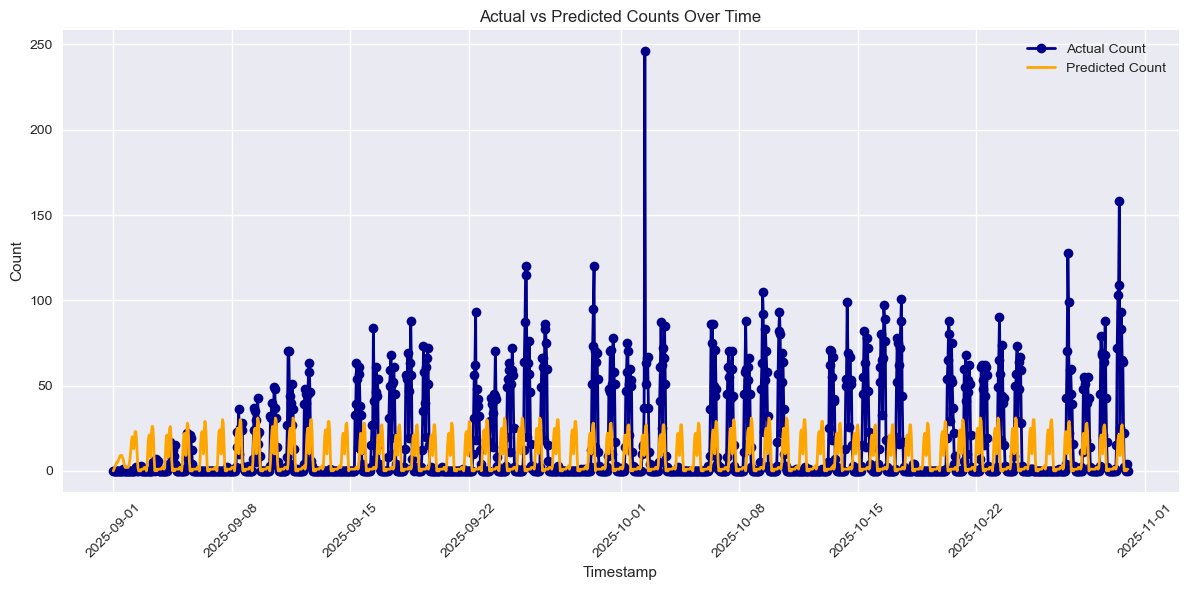

In [60]:
import pandas as pd
import matplotlib.pyplot as plt



# Plotting
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))
plt.plot(df_merged['timestamp'], df_merged['actual_count'], label='Actual Count', color='darkblue',marker='o', linewidth=2)
plt.plot(df_merged['timestamp'], df_merged['predicted_count'], label='Predicted Count', color='orange',marker='x', linewidth=2)

plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Actual vs Predicted Counts Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [41]:
import pandas as pd
from datetime import timedelta

# Take last sequence from dataset
last_sequence = scaled_data[-seq_len:]
last_sequence = last_sequence.reshape(1, seq_len, scaled_data.shape[1])

# Predict 1440 hours directly
future_pred = model.predict(last_sequence, verbose=0)[0]   # shape (1440,)

# Reshape for inverse scaling
future_pred_full = future_pred.reshape(-1, 1)

# Pad with zeros for other features if >1 input feature
future_pred_padded = np.concatenate([
    future_pred_full,
    np.zeros((forecast_horizon, scaled_data.shape[1] - 1))
], axis=1)

# Inverse transform back to original scale
future_pred_inv = scaler.inverse_transform(future_pred_padded)[:, 0]

# Build timestamps
last_timestamp = hourly_si_filtered.index[-1]
future_timestamps = [last_timestamp + timedelta(hours=i+1) for i in range(forecast_horizon)]

# Forecast DataFrame
df_forecast_lstm_multi_out = pd.DataFrame({
    'timestamp': future_timestamps,
    'predicted_si_count': future_pred_inv
})

print(df_forecast_lstm_multi_out)   # preview first 48 hours

               timestamp  predicted_si_count
0    2025-09-01 00:00:00           -0.811939
1    2025-09-01 01:00:00            0.710234
2    2025-09-01 02:00:00            1.589294
3    2025-09-01 03:00:00            2.738368
4    2025-09-01 04:00:00            5.034733
...                  ...                 ...
1435 2025-10-30 19:00:00           -1.578317
1436 2025-10-30 20:00:00           -2.782616
1437 2025-10-30 21:00:00           -3.699611
1438 2025-10-30 22:00:00           -2.862324
1439 2025-10-30 23:00:00           -1.955306

[1440 rows x 2 columns]


In [42]:
df_forecast_lstm_multi_out.to_csv('test.csv')

In [2]:
import pandas as pd

df = pd.read_excel("sep_oct_IT.xlsx")

In [3]:
df['timestamp'] = pd.to_datetime(df['Initial_SI_received_time'])

df = df.sort_values('timestamp')

df['hour'] = df['timestamp'].dt.floor('h')

start = df['hour'].min()
end = df['hour'].max()
all_hours = pd.date_range(start=start, end=end, freq='h')

hourly_count = df.groupby('hour').size().reindex(all_hours, fill_value=0).reset_index()
hourly_count.columns = ['hour', 'count']

In [4]:
hourly_count.to_csv("sample.csv")

In [10]:
import pandas as pd

df = pd.read_excel("sep_oct_IT_final.xlsx")

df = df.rename(columns={'hour': 'timestamp',
                        'predicted_si_count': 'actual_count'})

In [11]:
df

,timestamp,actual_count
0,2025-09-01 00:00:00,0
1,2025-09-01 01:00:00,0
2,2025-09-01 02:00:00,0
3,2025-09-01 03:00:00,0
4,2025-09-01 04:00:00,0
...,...,...
1601,2025-11-06 17:00:00,13
1602,2025-11-06 18:00:00,4
1603,2025-11-06 19:00:00,4
1604,2025-11-06 20:00:00,2


In [12]:
df_1 = pd.read_csv("test.csv")

df_1 = df_1.rename(columns={'predicted_si_count': 'predicted_count'})
df_1['predicted_count'] = df_1['predicted_count'].astype(int) 
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])

In [13]:
df_1

,timestamp,predicted_count
0,2025-09-01 00:00:00,1
1,2025-09-01 01:00:00,1
2,2025-09-01 02:00:00,2
3,2025-09-01 03:00:00,3
4,2025-09-01 04:00:00,5
...,...,...
1435,2025-10-30 19:00:00,2
1436,2025-10-30 20:00:00,3
1437,2025-10-30 21:00:00,4
1438,2025-10-30 22:00:00,3


In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df_merged = pd.merge(df, df_1, on='timestamp', how='inner')

def classify_prediction(row):
    actual = row['actual_count']
    predicted = row['predicted_count']

    if actual == predicted:
        return 'Exact Match'
    elif actual == 0:
        return 'No SI Received'
    elif abs(actual - predicted) <= 3:
        return '+/- 3 range'
    elif abs(actual - predicted) <= 5:
        return '+/- 5 range'
    elif abs(actual - predicted) <= 10:
        return '+/- 10 Range'
    else:
        return 'More than +/- 10 Range'


df_merged['match_status'] = df_merged.apply(classify_prediction, axis=1)

actuals = df_merged['actual_count']
preds = df_merged['predicted_count']

mae = mean_absolute_error(actuals, preds)
rmse = np.sqrt(mean_squared_error(actuals, preds))
mape = np.mean(np.abs((actuals - preds) / np.where(actuals==0, 1, actuals))) * 100
r2 = r2_score(actuals, preds)

print("Error Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.3f}")

print("\nBucket Distribution:")
print(df_merged['match_status'].value_counts())


print("\nSample Classified Data:")
print(df_merged[['timestamp', 'actual_count', 'predicted_count', 'match_status']])

Error Metrics:
MAE  : 11.58
RMSE : 21.22
MAPE : 258.37%
R²   : 0.328

Bucket Distribution:
match_status
No SI Received            678
More than +/- 10 Range    387
Exact Match               184
+/- 3 range                94
+/- 10 Range               73
+/- 5 range                24
Name: count, dtype: int64

Sample Classified Data:
               timestamp  actual_count  predicted_count    match_status
0    2025-09-01 00:00:00             0                1  No SI Received
1    2025-09-01 01:00:00             0                1  No SI Received
2    2025-09-01 02:00:00             0                2  No SI Received
3    2025-09-01 03:00:00             0                3  No SI Received
4    2025-09-01 04:00:00             0                5  No SI Received
...                  ...           ...              ...             ...
1435 2025-10-30 19:00:00             1                2     +/- 3 range
1436 2025-10-30 20:00:00             0                3  No SI Received
1437 2025-10-30 2

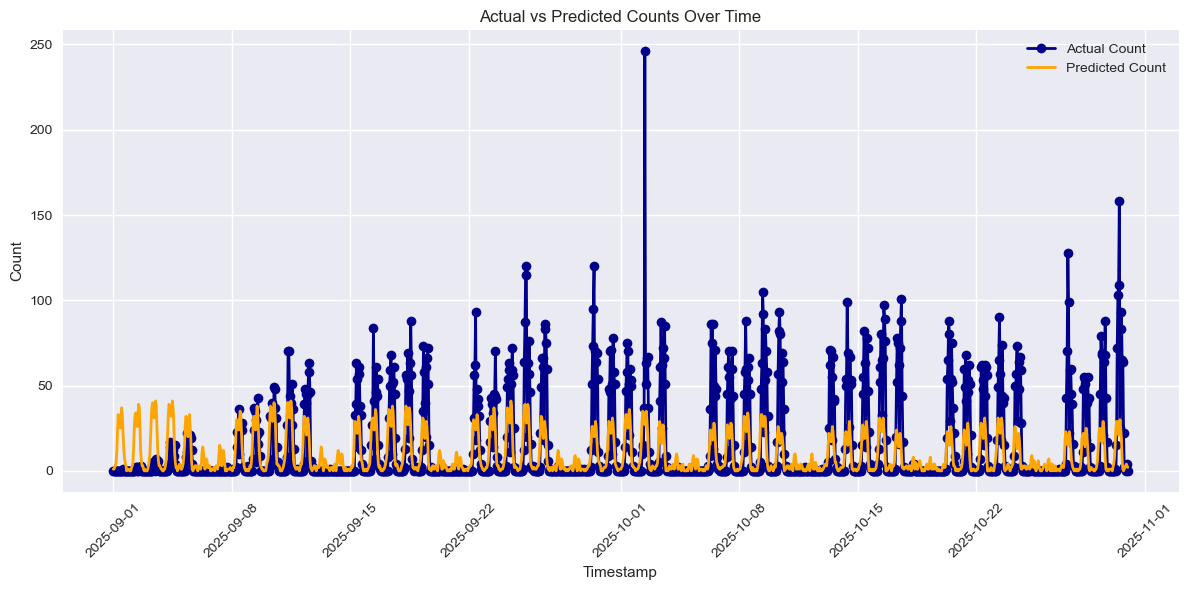

In [15]:
import pandas as pd
import matplotlib.pyplot as plt



# Plotting
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))
plt.plot(df_merged['timestamp'], df_merged['actual_count'], label='Actual Count', color='darkblue',marker='o', linewidth=2)
plt.plot(df_merged['timestamp'], df_merged['predicted_count'], label='Predicted Count', color='orange',marker='x', linewidth=2)

plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Actual vs Predicted Counts Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Model Fine tuning

In [3]:
import pandas as pd
import numpy as np

df = pd.read_excel("italy.xlsx")

df.set_index('Initial_SI_received_time', inplace=True)

df['si_received_count'] = 1
hourly_si = df['si_received_count'].resample('h').sum()
hourly_si_filtered = hourly_si.to_frame(name='SI_count')

hourly_si_filtered['day_of_week'] = hourly_si_filtered.index.dayofweek
hourly_si_filtered['hour'] = hourly_si_filtered.index.hour
hourly_si_filtered['is_weekend'] = hourly_si_filtered['day_of_week'].isin([5, 6]).astype(int)


hourly_si_filtered['hour_sin'] = np.sin(2*np.pi*hourly_si_filtered.index.hour/24)
hourly_si_filtered['hour_cos'] = np.cos(2*np.pi*hourly_si_filtered.index.hour/24)
hourly_si_filtered['dow_sin'] = np.sin(2*np.pi*hourly_si_filtered.index.dayofweek/7)
hourly_si_filtered['dow_cos'] = np.cos(2*np.pi*hourly_si_filtered.index.dayofweek/7)

for lag in [1, 2, 6, 12, 24]:
    hourly_si_filtered[f'lag_{lag}'] = hourly_si_filtered['SI_count'].shift(lag)

hourly_si_filtered['rolling_mean_24h'] = hourly_si_filtered['SI_count'].rolling(24).mean()
hourly_si_filtered['rolling_std_24h'] = hourly_si_filtered['SI_count'].rolling(24).std()

hourly_si_filtered = hourly_si_filtered.dropna()

In [4]:
hourly_si_filtered

,SI_count,day_of_week,hour,is_weekend,hour_sin,hour_cos,dow_sin,dow_cos,lag_1,lag_2,lag_6,lag_12,lag_24,rolling_mean_24h,rolling_std_24h
Initial_SI_received_time,,,,,,,,,,,,,,,
2009-10-31 16:00:00,0,5,16,1,-0.866025,-5.000000e-01,-0.974928,-0.222521,0.0,0.0,0.0,0.0,1.0,0.000000,0.000000
2009-10-31 17:00:00,0,5,17,1,-0.965926,-2.588190e-01,-0.974928,-0.222521,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2009-10-31 18:00:00,0,5,18,1,-1.000000,-1.836970e-16,-0.974928,-0.222521,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2009-10-31 19:00:00,0,5,19,1,-0.965926,2.588190e-01,-0.974928,-0.222521,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2009-10-31 20:00:00,0,5,20,1,-0.866025,5.000000e-01,-0.974928,-0.222521,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-09-23 14:00:00,2,1,14,0,-0.500000,-8.660254e-01,0.781831,0.623490,3.0,9.0,13.0,0.0,9.0,2.250000,3.709565
2025-09-23 15:00:00,3,1,15,0,-0.707107,-7.071068e-01,0.781831,0.623490,2.0,3.0,10.0,0.0,4.0,2.208333,3.694640
2025-09-23 16:00:00,0,1,16,0,-0.866025,-5.000000e-01,0.781831,0.623490,3.0,2.0,7.0,0.0,0.0,2.208333,3.694640


In [6]:
from sklearn.preprocessing import MinMaxScaler


features = [
    'SI_count',
    'day_of_week', 'is_weekend',
    'hour_sin', 'hour_cos',
    'dow_sin', 'dow_cos',
    'lag_1', 'lag_2', 'lag_6', 'lag_12', 'lag_24',
    'rolling_mean_24h', 'rolling_std_24h'
]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(hourly_si_filtered[features])

seq_len = 720              
forecast_horizon = 1440    

X, y = [], []

for i in range(seq_len, len(scaled_data) - forecast_horizon):
    X.append(scaled_data[i-seq_len:i])
    y.append(scaled_data[i:i+forecast_horizon, 0])

X = np.array(X)
y = np.array(y)

In [7]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [5]:
X_train.shape

(109749, 720, 14)

In [6]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, LSTM, Bidirectional, Dense, Dropout, Attention, GlobalAveragePooling1D

seq_len = X_train.shape[1]
num_features = X_train.shape[2]
forecast_horizon = y_train.shape[1]

inputs = Input(shape=(seq_len, num_features))

x = Bidirectional(LSTM(32, return_sequences=True))(inputs)
x = Dropout(0.2)(x)

x = Bidirectional(LSTM(16, return_sequences=True))(x)
x = Dropout(0.2)(x)

attention = Attention()([x, x])
x = GlobalAveragePooling1D()(attention)

x = Dense(32, activation='relu')(x)
outputs = Dense(forecast_horizon)(x)

model = Model(inputs, outputs)

model.compile(optimizer=Adam(learning_rate=0.01), loss='mse', metrics=['mae'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 720, 14)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 720, 64)   │     12,032 │ input_layer[0][0] │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 720, 64)   │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_1     │ (None, 720, 32)   │     10,368 │ dropout[0][0]     │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 720, 32)   │          0 │ bidirectional_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention           │ (None, 720, 32)   │          0 │ dropout_1[0][0],  │
│ (Attention)         │                   │            │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 32)        │          0 │ attention[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │      1,056 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 1440)      │     47,520 │ dense[0][0]       │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 70,976 (277.25 KB)

 Trainable params: 70,976 (277.25 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

Epoch 1/100
3430/3430 ━━━━━━━━━━━━━━━━━━━━ 2109s 612ms/step - loss: 3.8639e-07 - mae: 4.9104e-05 - val_loss: 0.0092 - val_mae: 0.0386 - learning_rate: 0.0100
Epoch 2/100
3430/3430 ━━━━━━━━━━━━━━━━━━━━ 2073s 604ms/step - loss: 8.6743e-09 - mae: 7.4756e-06 - val_loss: 0.0092 - val_mae: 0.0386 - learning_rate: 0.0100
Epoch 3/100
3430/3430 ━━━━━━━━━━━━━━━━━━━━ 2132s 621ms/step - loss: 7.1800e-09 - mae: 8.3422e-06 - val_loss: 0.0092 - val_mae: 0.0386 - learning_rate: 0.0100
Epoch 4/100
3430/3430 ━━━━━━━━━━━━━━━━━━━━ 2080s 606ms/step - loss: 6.9065e-09 - mae: 8.4801e-06 - val_loss: 0.0092 - val_mae: 0.0386 - learning_rate: 0.0100
Epoch 5/100
3430/3430 ━━━━━━━━━━━━━━━━━━━━ 2087s 609ms/step - loss: 1.0377e-10 - mae: 2.5769e-07 - val_loss: 0.0092 - val_mae: 0.0386 - learning_rate: 0.0050
Epoch 6/100
3430/3430 ━━━━━━━━━━━━━━━━━━━━ 2127s 620ms/step - loss: 2.5364e-10 - mae: 8.1111e-07 - val_loss: 0.0092 - val_mae: 0.0386 - learning_rate: 0.0050
Epoch 7/100
3430/3430 ━━━━━━━━━━━━━━━━━━━━ 2095s 611

In [13]:
model.save("Bidirectional_model.h5")

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

858/858 ━━━━━━━━━━━━━━━━━━━━ 118s 136ms/step
MAE: 0.038585458987683605
RMSE: 0.09568873315190775
R²: -0.19404432210269154


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Progress')
plt.show()

In [10]:
y_train_pred = model.predict(X_train, verbose=0)
y_test_pred = model.predict(X_test, verbose=0)

In [1]:
from tensorflow.keras.models import load_model

model = load_model('Bidirectional_model.h5', compile=False)
model.compile(optimizer='adam', loss='mse')

In [11]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Separate scaler for target variable (SI_count)
target_scaler = MinMaxScaler()
target_scaler.fit(hourly_si_filtered[['SI_count']])

def inverse_transform_target(pred_array):
    """Inverse transform predictions using target scaler only."""
    return target_scaler.inverse_transform(pred_array.reshape(-1, 1)).ravel()

# Apply inverse transform
y_train_pred_inv = inverse_transform_target(y_train_pred)
y_test_pred_inv = inverse_transform_target(y_test_pred)

y_train_inv = inverse_transform_target(y_train)
y_test_inv = inverse_transform_target(y_test)

# Evaluation
train_rmse = mean_squared_error(y_train_inv, y_train_pred_inv, squared=False)
test_rmse = mean_squared_error(y_test_inv, y_test_pred_inv, squared=False)

train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)

print(f"Train RMSE: {train_rmse:.2f}, MAE: {train_mae:.2f}")
print(f"Test RMSE: {test_rmse:.2f}, MAE: {test_mae:.2f}")

C:\Users\ISMAIMZ\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\ISMAIMZ\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 0.02, MAE: 0.00
Test RMSE: 16.08, MAE: 6.48


C:\Users\ISMAIMZ\AppData\Local\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


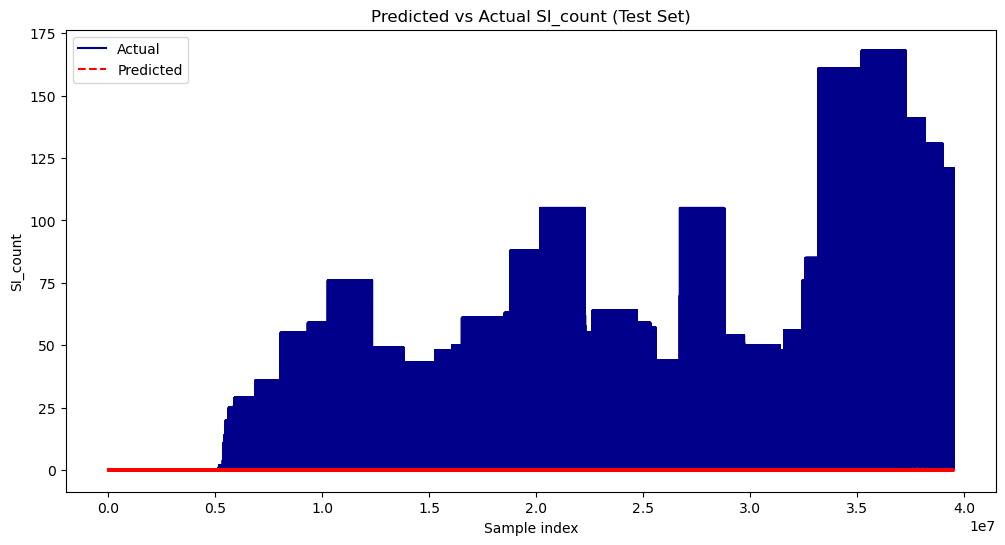

In [12]:
import numpy as np

plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label="Actual", color="darkblue")
plt.plot(y_test_pred_inv, label="Predicted", color="red", linestyle="--")
plt.title("Predicted vs Actual SI_count (Test Set)")
plt.xlabel("Sample index")
plt.ylabel("SI_count")
plt.legend()
plt.show()

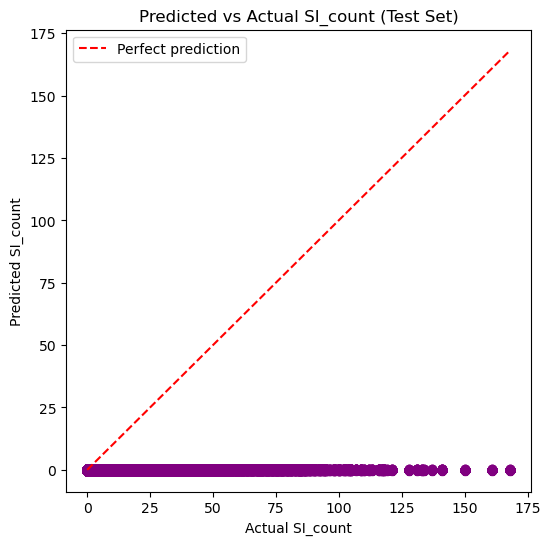

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test_inv, y_test_pred_inv, alpha=0.6, color="purple")
plt.plot([y_test_inv.min(), y_test_inv.max()],
         [y_test_inv.min(), y_test_inv.max()],
         'r--', label="Perfect prediction")
plt.title("Predicted vs Actual SI_count (Test Set)")
plt.xlabel("Actual SI_count")
plt.ylabel("Predicted SI_count")
plt.legend()
plt.show()

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel("italy.xlsx")

df.set_index('Initial_SI_received_time', inplace=True)

df['si_received_count'] = 1
hourly_si = df['si_received_count'].resample('h').sum()
hourly_si_filtered = hourly_si['2023-01-01':'2025-08-31']
hourly_si_filtered = hourly_si_filtered.to_frame(name='SI_count')

hourly_si_filtered['day_of_week'] = hourly_si_filtered.index.dayofweek
hourly_si_filtered['hour'] = hourly_si_filtered.index.hour
hourly_si_filtered['is_weekend'] = hourly_si_filtered['day_of_week'].isin([5, 6]).astype(int)


hourly_si_filtered['hour_sin'] = np.sin(2*np.pi*hourly_si_filtered.index.hour/24)
hourly_si_filtered['hour_cos'] = np.cos(2*np.pi*hourly_si_filtered.index.hour/24)
hourly_si_filtered['dow_sin'] = np.sin(2*np.pi*hourly_si_filtered.index.dayofweek/7)
hourly_si_filtered['dow_cos'] = np.cos(2*np.pi*hourly_si_filtered.index.dayofweek/7)

for lag in [1, 2, 6, 12, 24]:
    hourly_si_filtered[f'lag_{lag}'] = hourly_si_filtered['SI_count'].shift(lag)

hourly_si_filtered['rolling_mean_24h'] = hourly_si_filtered['SI_count'].rolling(24).mean()
hourly_si_filtered['rolling_std_24h'] = hourly_si_filtered['SI_count'].rolling(24).std()

hourly_si_filtered = hourly_si_filtered.dropna()

In [2]:
from sklearn.preprocessing import MinMaxScaler


features = [
    'SI_count',
    'day_of_week', 'is_weekend',
    'hour_sin', 'hour_cos',
    'dow_sin', 'dow_cos',
    'lag_1', 'lag_2', 'lag_6', 'lag_12', 'lag_24',
    'rolling_mean_24h', 'rolling_std_24h'
]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(hourly_si_filtered[features])

seq_len = 720              
forecast_horizon = 1440    

X, y = [], []

for i in range(seq_len, len(scaled_data) - forecast_horizon):
    X.append(scaled_data[i-seq_len:i])
    y.append(scaled_data[i:i+forecast_horizon, 0])

X = np.array(X)
y = np.array(y)

In [3]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [4]:
X.shape

(21192, 720, 14)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(128, return_sequences=False),
    Dropout(0.2),
    Dense(forecast_horizon)   
])

model.compile(optimizer=Adam(learning_rate=1e-4), loss='mse')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        73,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1440)           │       185,760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,976 (1011.62 KB)

 Trainable params: 258,976 (1011.62 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
lr_schedule = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test, y_test),
    callbacks=[early_stop, lr_schedule],
    verbose=1
)

Epoch 1/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 265s 495ms/step - loss: 0.0037 - val_loss: 0.0200 - learning_rate: 1.0000e-04
Epoch 2/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 287s 542ms/step - loss: 0.0027 - val_loss: 0.0193 - learning_rate: 1.0000e-04
Epoch 3/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 435s 820ms/step - loss: 0.0025 - val_loss: 0.0178 - learning_rate: 1.0000e-04
Epoch 4/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 282s 531ms/step - loss: 0.0023 - val_loss: 0.0169 - learning_rate: 1.0000e-04
Epoch 5/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 273s 515ms/step - loss: 0.0022 - val_loss: 0.0165 - learning_rate: 1.0000e-04
Epoch 6/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 279s 527ms/step - loss: 0.0021 - val_loss: 0.0162 - learning_rate: 1.0000e-04
Epoch 7/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 290s 547ms/step - loss: 0.0021 - val_loss: 0.0155 - learning_rate: 1.0000e-04
Epoch 8/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 296s 558ms/step - loss: 0.0020 - val_loss: 0.0154 - learning_rate: 1.0000e-04
Epoch 9/100
530/530 ━━━━━━━━━━━━━━━━━━━━ 299s 56

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R²:", r2_score(y_test, y_pred))

133/133 ━━━━━━━━━━━━━━━━━━━━ 28s 211ms/step
MAE: 0.06137878543692271
RMSE: 0.1134402274596622
R²: 0.4804694888186213


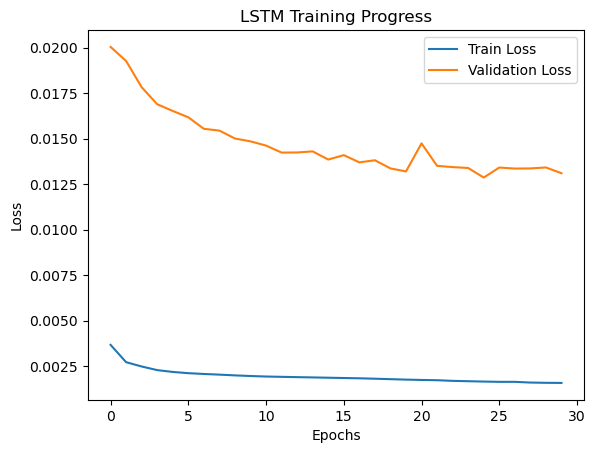

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('LSTM Training Progress')
plt.show()

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

features = [
    'SI_count',
    'day_of_week', 'is_weekend',
    'hour_sin', 'hour_cos',
    'dow_sin', 'dow_cos',
    'lag_1', 'lag_2', 'lag_6', 'lag_12', 'lag_24',
    'rolling_mean_24h', 'rolling_std_24h'
]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(hourly_si_filtered[features])

In [24]:
seq_len = 720              # input length
forecast_horizon = 1440    # output length

X, y = [], []
for i in range(seq_len, len(scaled_data) - forecast_horizon):
    X.append(scaled_data[i-seq_len:i])
    y.append(scaled_data[i:i+forecast_horizon, 0])  # target is SI_count

X = np.array(X)
y = np.array(y)

In [25]:
X_train, y_train = X, y

y_train_pred = model.predict(X_train, verbose=0)

In [26]:
def inverse_transform(pred_array):
    pred_array = np.array(pred_array)

    if pred_array.ndim == 1:  # single-step
        pred_full = pred_array.reshape(-1, 1)
        pred_padded = np.concatenate([
            pred_full,
            np.zeros((pred_full.shape[0], scaled_data.shape[1] - 1))
        ], axis=1)
        return scaler.inverse_transform(pred_padded)[:, 0]

    elif pred_array.ndim == 2:  # multi-step
        n_samples, horizon = pred_array.shape
        pred_inv = []
        for h in range(horizon):
            step = pred_array[:, h].reshape(-1, 1)
            step_padded = np.concatenate([
                step,
                np.zeros((n_samples, scaled_data.shape[1] - 1))
            ], axis=1)
            pred_inv.append(scaler.inverse_transform(step_padded)[:, 0])
        return np.stack(pred_inv, axis=1)

    else:
        raise ValueError(f"Unexpected array shape: {pred_array.shape}")

In [27]:
y_train_pred_inv = inverse_transform(y_train_pred)
y_train_inv = inverse_transform(y_train)

In [28]:
train_rmse = mean_squared_error(
    y_train_inv.flatten(), y_train_pred_inv.flatten(), squared=False
)
train_mae = mean_absolute_error(
    y_train_inv.flatten(), y_train_pred_inv.flatten()
)

print(f"Train RMSE: {train_rmse:.2f}, MAE: {train_mae:.2f}")

C:\Users\ISMAIMZ\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Train RMSE: 10.33, MAE: 5.20


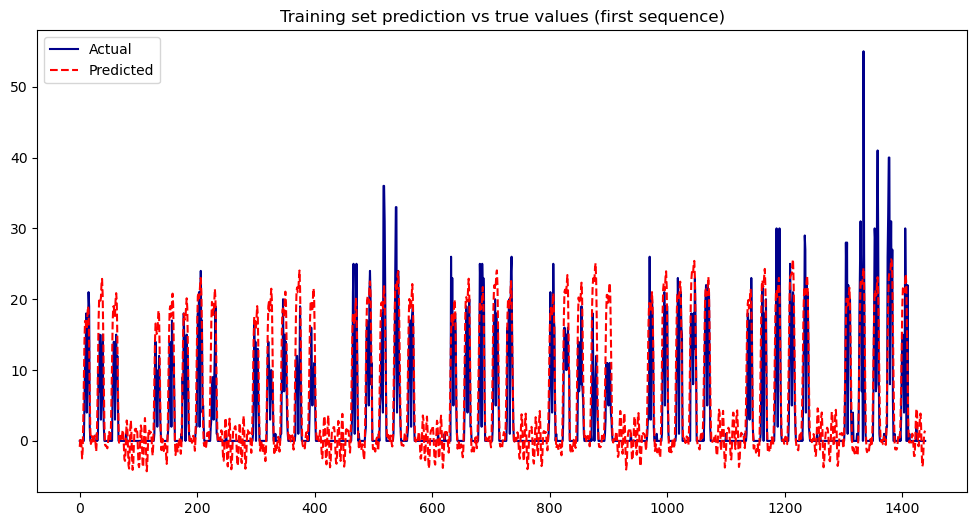

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv[0],label="Actual", color="darkblue")
plt.plot(y_train_pred_inv[0],  label="Predicted", color="red", linestyle="--")
plt.legend()
plt.title("Training set prediction vs true values (first sequence)")
plt.show()

In [32]:
import pandas as pd
from datetime import timedelta

# Take last sequence from dataset
last_sequence = scaled_data[-seq_len:]
last_sequence = last_sequence.reshape(1, seq_len, scaled_data.shape[1])

# Predict 1440 hours directly
future_pred = model.predict(last_sequence, verbose=0)[0]   # shape (1440,)

# Reshape for inverse scaling
future_pred_full = future_pred.reshape(-1, 1)

# Pad with zeros for other features if >1 input feature
future_pred_padded = np.concatenate([
    future_pred_full,
    np.zeros((forecast_horizon, scaled_data.shape[1] - 1))
], axis=1)

# Inverse transform back to original scale
future_pred_inv = scaler.inverse_transform(future_pred_padded)[:, 0]

# Build timestamps
last_timestamp = hourly_si_filtered.index[-1]
future_timestamps = [last_timestamp + timedelta(hours=i+1) for i in range(forecast_horizon)]

# Forecast DataFrame
df_forecast_lstm_multi_out = pd.DataFrame({
    'timestamp': future_timestamps,
    'predicted_si_count': future_pred_inv
})

print(df_forecast_lstm_multi_out)   # preview first 48 hours

               timestamp  predicted_si_count
0    2025-09-01 00:00:00           -1.397570
1    2025-09-01 01:00:00           -2.340258
2    2025-09-01 02:00:00           -2.726319
3    2025-09-01 03:00:00           -4.373799
4    2025-09-01 04:00:00           -5.684470
...                  ...                 ...
1435 2025-10-30 19:00:00           -1.575336
1436 2025-10-30 20:00:00           -4.641109
1437 2025-10-30 21:00:00           -4.243992
1438 2025-10-30 22:00:00           -1.573962
1439 2025-10-30 23:00:00           -0.433587

[1440 rows x 2 columns]


In [33]:
df_forecast_lstm_multi_out.to_csv('test.csv')

In [34]:
import pandas as pd

df = pd.read_excel("sep_oct_IT_final.xlsx")

df = df.rename(columns={'hour': 'timestamp',
                        'predicted_si_count': 'actual_count'})

In [35]:
df_1 = pd.read_csv("test.csv")

df_1 = df_1.rename(columns={'predicted_si_count': 'predicted_count'})
df_1['predicted_count'] = df_1['predicted_count'].astype(int) 
df_1['timestamp'] = pd.to_datetime(df_1['timestamp'])

In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df_merged = pd.merge(df, df_1, on='timestamp', how='inner')

def classify_prediction(row):
    actual = row['actual_count']
    predicted = row['predicted_count']

    if actual == predicted:
        return 'Exact Match'
    elif actual == 0:
        return 'No SI Received'
    elif abs(actual - predicted) <= 3:
        return '+/- 3 range'
    elif abs(actual - predicted) <= 5:
        return '+/- 5 range'
    elif abs(actual - predicted) <= 10:
        return '+/- 10 Range'
    else:
        return 'More than +/- 10 Range'


df_merged['match_status'] = df_merged.apply(classify_prediction, axis=1)

actuals = df_merged['actual_count']
preds = df_merged['predicted_count']

mae = mean_absolute_error(actuals, preds)
rmse = np.sqrt(mean_squared_error(actuals, preds))
mape = np.mean(np.abs((actuals - preds) / np.where(actuals==0, 1, actuals))) * 100
r2 = r2_score(actuals, preds)

print("Error Metrics:")
print(f"MAE  : {mae:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"MAPE : {mape:.2f}%")
print(f"R²   : {r2:.3f}")

print("\nBucket Distribution:")
print(df_merged['match_status'].value_counts())


print("\nSample Classified Data:")
print(df_merged[['timestamp', 'actual_count', 'predicted_count', 'match_status']])

Error Metrics:
MAE  : 10.95
RMSE : 19.37
MAPE : 272.37%
R²   : 0.441

Bucket Distribution:
match_status
No SI Received            719
More than +/- 10 Range    397
Exact Match               142
+/- 3 range                96
+/- 10 Range               60
+/- 5 range                26
Name: count, dtype: int64

Sample Classified Data:
               timestamp  actual_count  predicted_count    match_status
0    2025-09-01 00:00:00             0                1  No SI Received
1    2025-09-01 01:00:00             0                2  No SI Received
2    2025-09-01 02:00:00             0                3  No SI Received
3    2025-09-01 03:00:00             0                4  No SI Received
4    2025-09-01 04:00:00             0                6  No SI Received
...                  ...           ...              ...             ...
1435 2025-10-30 19:00:00             1                2     +/- 3 range
1436 2025-10-30 20:00:00             0                5  No SI Received
1437 2025-10-30 2

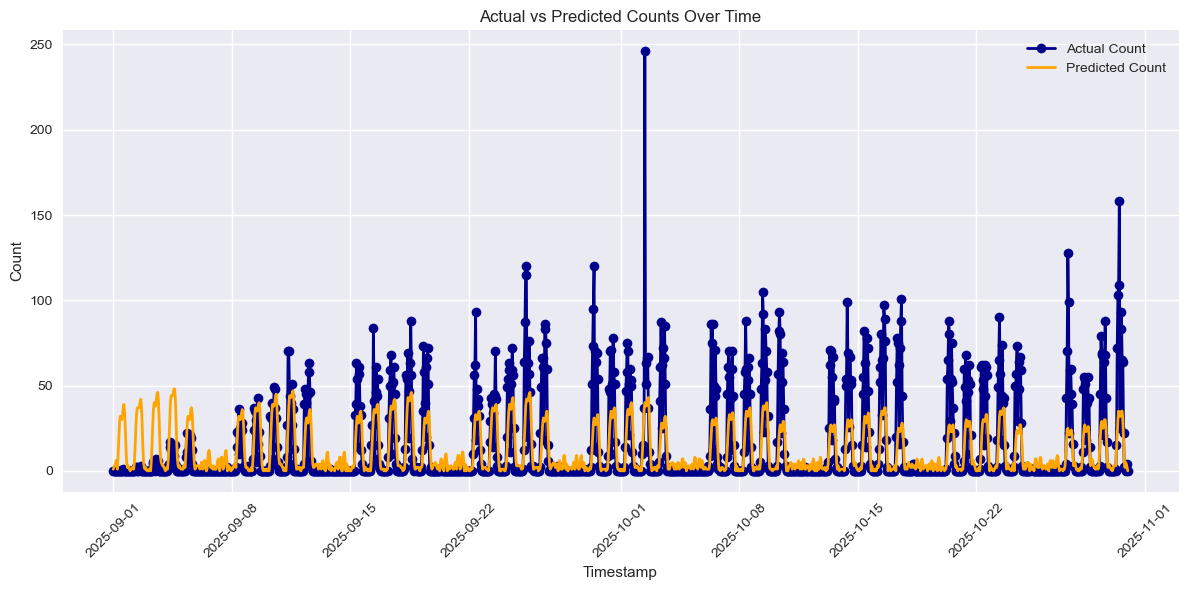

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.figure(figsize=(12, 6))
plt.plot(df_merged['timestamp'], df_merged['actual_count'], label='Actual Count', color='darkblue',marker='o', linewidth=2)
plt.plot(df_merged['timestamp'], df_merged['predicted_count'], label='Predicted Count', color='orange',marker='x', linewidth=2)

plt.xlabel('Timestamp')
plt.ylabel('Count')
plt.title('Actual vs Predicted Counts Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()